<a href="https://colab.research.google.com/github/SpandanaKalakonda/linkedinPosts/blob/main/few_shot_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import (
    load_img,
    img_to_array)
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
#Siamese network model

def create_siamese_network(input_shape):
  input_layer = layers.Input(shape=input_shape)
  flatten_layer = layers.Flatten()(input_layer)
  dense_layer = layers.Dense(128, activation='relu')(flatten_layer)
  output_layer = layers.Dense(64, activation='sigmoid')(dense_layer)

  model = models.Model(inputs=input_layer, outputs=output_layer)
  return model

In [ ]:
#Siamese pair

def create_siamese_pair(num_classes):
  input_shape = (28,28)
  base_network = create_siamese_network(input_shape)

  input_a = layers.Input(shape=input_shape)
  input_b = layers.Input(shape=input_shape)

  output_a = base_network(input_a)
  output_b = base_network(input_b)

  l1_distance = tf.keras.backend.abs(output_a - output_b)

  classification_output = layers.Dense(num_classes, activation='softmax')(l1_distance)

  siamese_pair_model = models.Model(inputs=[input_a,input_b], outputs=classification_output)
  return siamese_pair_model

In [ ]:
def preprocess_image(image_path):
  img = load_img(image_path, target_size=(28,28), color_mode='grayscale')
  img_array = img_to_array(img)/255.0
  return img_array

In [ ]:
image_gucci1 = Image.open('/content/gucci_logo1.jpeg')
image_gucci2 = Image.open('/content/gucci_logo2.jpeg')
image_channel1 = Image.open('/content/chanel_logo1.png')
image_channel2 = Image.open('/content/chanel_logo2.png')

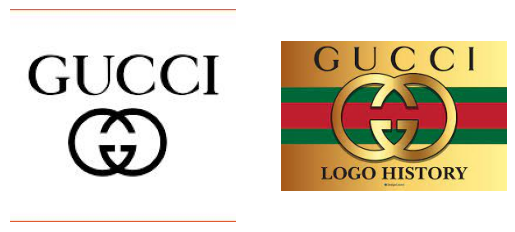

In [ ]:
# Display the images in a 1x2 grid
plt.subplot(1, 2, 1)
plt.imshow(image_gucci1)
plt.axis('off')  # Hide axes

plt.subplot(1, 2, 2)
plt.imshow(image_gucci2)
plt.axis('off')  # Hide axes

plt.show()

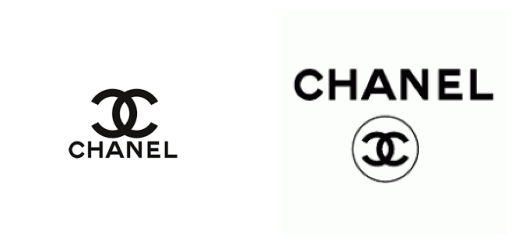

In [ ]:
# Display the images in a 1x2 grid
plt.subplot(1, 2, 1)
plt.imshow(image_channel1)
plt.axis('off')  # Hide axes

plt.subplot(1, 2, 2)
plt.imshow(image_channel2)
plt.axis('off')  # Hide axes

plt.show()

In [ ]:
gucci_logo_1 = preprocess_image(image_gucci1)
gucci_logo_2 = preprocess_image(image_gucci2)
chanel_logo_1 = preprocess_image(image_channel1)
chanel_logo_2 = preprocess_image(image_channel2)

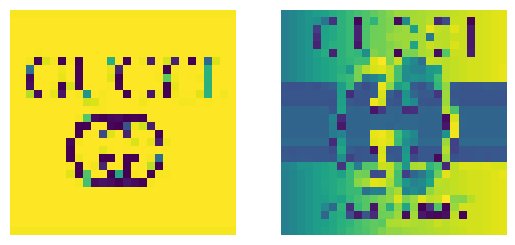

In [ ]:
# Display the images in a 1x2 grid
plt.subplot(1, 2, 1)
plt.imshow(gucci_logo_1)
plt.axis('off')  # Hide axes

plt.subplot(1, 2, 2)
plt.imshow(gucci_logo_2)
plt.axis('off')  # Hide axes

plt.show()

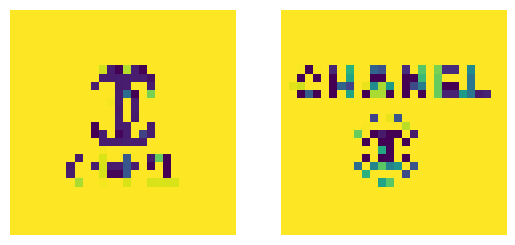

In [ ]:
# Display the images in a 1x2 grid
plt.subplot(1, 2, 1)
plt.imshow(chanel_logo_1)
plt.axis('off')  # Hide axes

plt.subplot(1, 2, 2)
plt.imshow(chanel_logo_2)
plt.axis('off')  # Hide axes

plt.show()

In [ ]:
num_classes = 2
siamese_pair_model = create_siamese_pair(num_classes)

In [ ]:
siamese_pair_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Create a pair for prediction
pair_for_prediction = np.array([[chanel_logo_1,chanel_logo_2]])

# Make predictions using the trained Siamese model
predictions = siamese_pair_model.predict([pair_for_prediction[:, 0], pair_for_prediction[:, 1]])

# Print the predicted similarity score
print("Similarity Score:", predictions[0][0])

# You can set a threshold to decide if the images are similar based on the score
threshold = 0.5  # Adjust as needed
if predictions[0][0] > threshold:
    print("The images are similar.")
else:
    print("The images are dissimilar.")

1/1 [==============================] - 0s 249ms/step
Similarity Score: 0.5223193
The images are similar.


In [ ]:
# Create a pair for prediction
pair_for_prediction = np.array([[gucci_logo_1,gucci_logo_2]])

# Make predictions using the trained Siamese model
predictions = siamese_pair_model.predict([pair_for_prediction[:, 0], pair_for_prediction[:, 1]])

# Print the predicted similarity score
print("Similarity Score:", predictions[0][0])

# You can set a threshold to decide if the images are similar based on the score
threshold = 0.5  # Adjust as needed
if predictions[0][0] > threshold:
    print("The images are similar.")
else:
    print("The images are dissimilar.")

1/1 [==============================] - 0s 33ms/step
Similarity Score: 0.47646865
The images are dissimilar.


In [ ]:
# Create a pair for prediction
pair_for_prediction = np.array([[gucci_logo_1,chanel_logo_2]])

# Make predictions using the trained Siamese model
predictions = siamese_pair_model.predict([pair_for_prediction[:, 0], pair_for_prediction[:, 1]])

# Print the predicted similarity score
print("Similarity Score:", predictions[0][0])

# You can set a threshold to decide if the images are similar based on the score
threshold = 0.5  # Adjust as needed
if predictions[0][0] > threshold:
    print("The images are similar.")
else:
    print("The images are dissimilar.")

1/1 [==============================] - 0s 47ms/step
Similarity Score: 0.509043
The images are similar.
